In [1]:
import os
import sys

# os.path.join(os.path.dirname(__file__)
sys.path.append("../")  # location of config file
sys.path.append("../../") 


import config

os.chdir("../../") # working directory inside exploration

import glob
import numpy as np
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
from smartprint import smartprint as sprint
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

In [3]:
! pwd

/Users/nishant/Documents/GitHub/CTP/exploration


london 4 1 55


london_55_days processed:  91%|███████████▉ | 215/235 [00:00<00:00, 8241.64it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-4
Iterating over 100 random source files: 100%|█| 100/100 [02:02<00:00,  1.23s/it]


prefix, obj.offset : london-4-1-55- 86
melbourne 4 1 55


melbourne_55_days processed:  91%|█████████ | 213/235 [00:00<00:00, 8272.48it/s]


start_date, end_date : 2020-12-31 2020-12-30
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 213


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/melbourn
Iterating over 100 random source files: 100%|█| 100/100 [02:18<00:00,  1.39s/it]


prefix, obj.offset : melbourne-4-1-55- 86
madrid 4 1 55


madrid_55_days processed:  91%|███████████▊ | 214/235 [00:00<00:00, 7944.81it/s]


start_date, end_date : 2022-01-01 2021-12-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 214


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/madrid-4
Iterating over 100 random source files: 100%|█| 100/100 [01:58<00:00,  1.19s/it]


prefix, obj.offset : madrid-4-1-55- 86


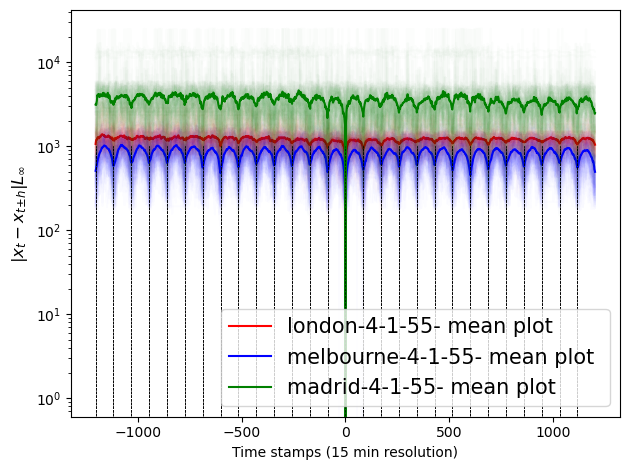

In [7]:
for city_ in config.city_list:
    city = city_.lower() 
    for io_len in [4]: # range(1,9):
        for pred_horiz in [1]: # config.pred_horiz_def:
            for scale in config.scales_def:
                print (city, io_len, pred_horiz, scale)

                prefix = ProcessRaw.file_prefix(cityname=city, io_length=io_len, pred_horiz=pred_horiz, scale=scale)

                obj = ProcessRaw(cityname=city, i_o_length=io_len, prediction_horizon=pred_horiz, grid_size=scale)
                    
                folderpath = os.path.join(config.DATA_FOLDER, config.train_folder_name, prefix)
                filenameslist = glob.glob(folderpath + "/*_x.npy")
                
                random.shuffle(filenameslist)
                
                
                multiple_source_distance_list = []
                for _ in tqdm(range(100), desc="Iterating over 100 random source files"):
                    random.shuffle(filenameslist) # inefficient method of choosing a random filename
                    
                    dist_list = []
                    
                    # choose_filename until we get something in the middle of the dataset so that 
                    # we can iterate over weeks
                    
                    
                    source_file = filenameslist[0]
                    source_x = np.load(source_file)
                    # integer id of filename
                    n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                    
                    while ( n - 14 * obj.offset < 0 or n + 14 * obj.offset > 8500 ): # 8500 number of training data points across all scenarios.
                        # keep looking for a source point near the centre of the dataset 
                        # so that we can look one week ahead and behind
                        
                        random.shuffle(filenameslist) # inefficient method of choosing a random filename
                        
                        source_file = filenameslist[0]
                        # integer id of filename
                        n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                        source_x = np.load(source_file)

                        
                    # sprint (n)

                    # Now, we iterate through one week of temporal neighbours
                    # 2 weeks before and 2 weeks after
                    for i in range(n-14*obj.offset, n+14*obj.offset):

                        neighbour_filename = (source_file.split(prefix)[0] + \
                                   prefix + \
                                   source_file.split(prefix)[1] + \
                                   prefix + \
                                   str(i) + "_x.npy")
                        neighbour = np.load(neighbour_filename)
                        
                        dist_list.append (np.max(np.abs( neighbour - source_x)) )
                        
                    multiple_source_distance_list.append(dist_list)
                    plt.plot(range(-14*obj.offset, 14*obj.offset), (dist_list), alpha=0.01, color=city_color[city])
                    

                    
                multiple_source_distance_list = np.array(multiple_source_distance_list)
                
                mean_plot = (np.mean(multiple_source_distance_list, axis=0))
                plt.plot(range(-14*obj.offset, +14*obj.offset), (mean_plot), label= prefix + " mean plot ", color=city_color[city])

                
                # median_plot = (np.median(multiple_source_distance_list, axis=0))
                # plt.plot(np.convolve(median_plot, [1/1]*1, "valid"), label= prefix + " median plot ")
                
                
                sprint (prefix, obj.offset)
            #     break
            # break
        # break
    # break
    for i in range(-14, 14):
        plt.plot([i*obj.offset] * 1000, range(0,1000), '--', color="black", linewidth=0.5)

        
plt.ylabel(r'$\|x_t-x_{t{\pm}h}\|L_{\infty}$', fontsize=12)
plt.legend(fontsize=15, loc="lower right")
plt.xlabel("Time stamps (15 min resolution)")
plt.yscale('log')
plt.tight_layout()
plt.savefig("city_list_scales_4_1.png", dpi=600)
plt.show()   # obj._clean_intermediate_files()

london 4 1 55


london_55_days processed:  91%|███████████▉ | 215/235 [00:00<00:00, 6913.18it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-4
Iterating over 100 random source files: 100%|█| 200/200 [03:07<00:00,  1.07it/s]


prefix : london-4-1-55-
melbourne 4 1 55


melbourne_55_days processed:  91%|█████████ | 213/235 [00:00<00:00, 7807.89it/s]


start_date, end_date : 2020-12-31 2020-12-30
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 213


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/melbourn
Iterating over 100 random source files: 100%|█| 200/200 [02:42<00:00,  1.23it/s]


prefix : melbourne-4-1-55-
madrid 4 1 55


madrid_55_days processed:  91%|███████████▊ | 214/235 [00:00<00:00, 9109.63it/s]


start_date, end_date : 2022-01-01 2021-12-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 214


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/madrid-4
Iterating over 100 random source files: 100%|█| 200/200 [02:15<00:00,  1.47it/s]


prefix : madrid-4-1-55-


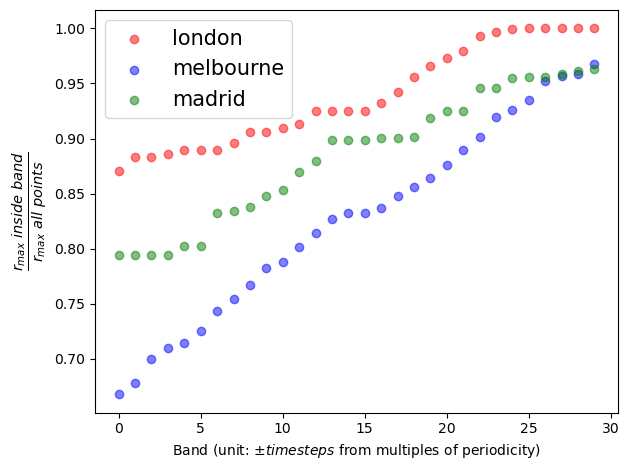

In [38]:
# stochasticity plot; max inside band, max outside band

for city_ in config.city_list:
    city = city_.lower() 
    label_print = True
    for io_len in [4]: # range(1,9):
        for pred_horiz in [1]: # config.pred_horiz_def:
            for scale in config.scales_def:
                print (city, io_len, pred_horiz, scale)

                prefix = ProcessRaw.file_prefix(cityname=city, io_length=io_len, pred_horiz=pred_horiz, scale=scale)

                obj = ProcessRaw(cityname=city, i_o_length=io_len, prediction_horizon=pred_horiz, grid_size=scale)
                    
                folderpath = os.path.join(config.DATA_FOLDER, config.train_folder_name, prefix)
                filenameslist = glob.glob(folderpath + "/*_x.npy")
                
                random.shuffle(filenameslist)
                
                
                multiple_source_distance_list = []
                multiple_source_temp_distance_list = []
                for _ in tqdm(range(200), desc="Iterating over 100 random source files"):
                    random.shuffle(filenameslist) # inefficient method of choosing a random filename
                    
                    dist_list = []
                    temp_dist_list = []
                    
                    # choose_filename until we get something in the middle of the dataset so that 
                    # we can iterate over weeks
                    
                    
                    source_file = filenameslist[0]
                    source_x = np.load(source_file)
                    # integer id of filename
                    n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                    
                    while ( n - 7 * obj.offset < 0 or n + 7 * obj.offset > 8500 ): # 8500 number of training data points across all scenarios.
                        # keep looking for a source point near the centre of the dataset 
                        # so that we can look one week ahead and behind
                        
                        random.shuffle(filenameslist) # inefficient method of choosing a random filename
                        
                        source_file = filenameslist[0]
                        # integer id of filename
                        n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                        source_x = np.load(source_file)

                        
                    # sprint (n)

                    # Now, we iterate through one week of temporal neighbours
                    # 3 days before and 3 days after
                    for i in range(n-7*obj.offset, n+7*obj.offset):

                        neighbour_filename = (source_file.split(prefix)[0] + \
                                   prefix + \
                                   source_file.split(prefix)[1] + \
                                   prefix + \
                                   str(i) + "_x.npy")
                        neighbour = np.load(neighbour_filename)
                        
                        dist_list.append (np.max(np.abs( neighbour - source_x)) )
                        temp_dist_list.append(i - n)
                        
                        # plt.scatter(temp_dist_list, dist_list)
                        
                    multiple_source_distance_list.append(dist_list)
                    multiple_source_temp_distance_list.append(temp_dist_list)

                    
                multiple_source_distance_list = np.array(multiple_source_distance_list)
                multiple_source_temp_distance_list = np.array(multiple_source_temp_distance_list)
                
                mean_plot = np.mean(multiple_source_distance_list, axis=0)
                dict_ = dict(zip(range(-7*obj.offset, 7*obj.offset), mean_plot))

                b = []
                max_dict = max(dict_.values())
                band_range = range(0, 30)
                for band in band_range:
                    a = []
                    for key in dict_:
                        if key % obj.offset <= band:
                            a.append(dict_[key])
                    b.append(max(a)/max_dict)
                if label_print:
                    plt.scatter(band_range, b, color=city_color[city], label=city, alpha=0.5)
                    label_print = False
                else:
                    plt.scatter(band_range, b, color=city_color[city], alpha=0.5)
                # plt.show()
                
                sprint (prefix)
            #     break
            # break
        # break
    # break
    
    # break    
plt.ylabel(r'$\frac{r_{max}~inside~band}{{r_{max}~all~points}}$', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel(r"Band (unit: $\pm timesteps$ from multiples of periodicity)")
# plt.yscale('log')
plt.tight_layout()
plt.savefig("cumulative_dist_different_io_and_pred_horiz.png", dpi=600)
plt.show()   # obj._clean_intermediate_files()

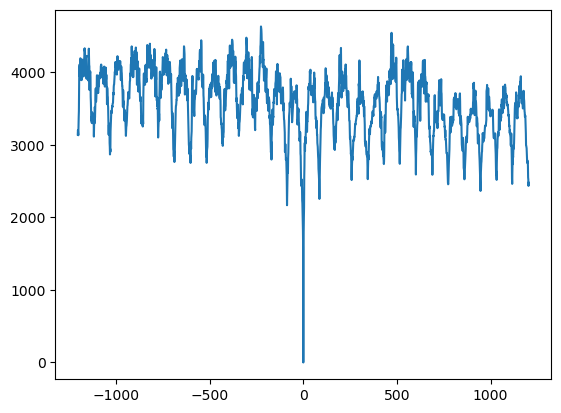

In [10]:
plt.plot(range(-14*obj.offset, +14*obj.offset), mean_plot)

dict_ = dict(zip(range(-14*obj.offset, +14*obj.offset), mean_plot))

b = []
max_dict = max(dict_.values())
band_range = range(0, 30)
for band in band_range:
    a = []
    for key in dict_:
        if key % obj.offset <= band:
            a.append(dict_[key])
    b.append(max(a)/max_dict)
plt.scatter(band_range, b, color=city_color[cityname])
plt.show()
    
    


len(dict_) : 2408


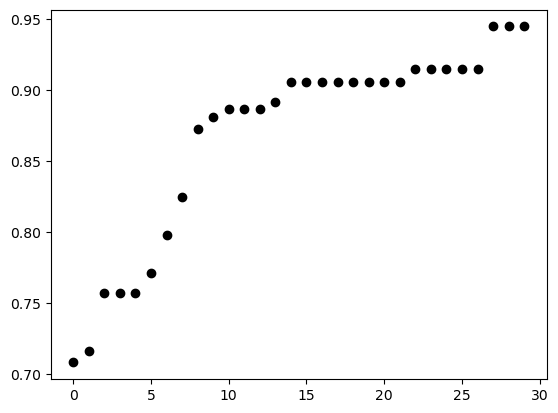

In [21]:
# stochasticity plot; max inside band, max outside band

for city_ in config.city_list:
    city = city_.lower() 
    label_print = True
    for io_len in [4]: # range(1,9):
        for pred_horiz in [1]: # config.pred_horiz_def:
            for scale in config.scales_def:
                print (city, io_len, pred_horiz, scale)

                prefix = ProcessRaw.file_prefix(cityname=city, io_length=io_len, pred_horiz=pred_horiz, scale=scale)

                obj = ProcessRaw(cityname=city, i_o_length=io_len, prediction_horizon=pred_horiz, grid_size=scale)
                    
                folderpath = os.path.join(config.DATA_FOLDER, config.train_folder_name, prefix)
                filenameslist = glob.glob(folderpath + "/*_x.npy")
                
                random.shuffle(filenameslist)
                
                
                multiple_source_distance_list = []
                multiple_source_temp_distance_list = []
                for _ in tqdm(range(200), desc="Iterating over 100 random source files"):
                    random.shuffle(filenameslist) # inefficient method of choosing a random filename
                    
                    dist_list = []
                    temp_dist_list = []
                    
                    # choose_filename until we get something in the middle of the dataset so that 
                    # we can iterate over weeks
                    
                    
                    source_file = filenameslist[0]
                    source_x = np.load(source_file)
                    # integer id of filename
                    n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                    
                    while ( n - 7 * obj.offset < 0 or n + 7 * obj.offset > 8500 ): # 8500 number of training data points across all scenarios.
                        # keep looking for a source point near the centre of the dataset 
                        # so that we can look one week ahead and behind
                        
                        random.shuffle(filenameslist) # inefficient method of choosing a random filename
                        
                        source_file = filenameslist[0]
                        # integer id of filename
                        n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                        source_x = np.load(source_file)

                        
                    # sprint (n)

                    # Now, we iterate through one week of temporal neighbours
                    # 3 days before and 3 days after
                    for i in range(n-7*obj.offset, n+7*obj.offset):

                        neighbour_filename = (source_file.split(prefix)[0] + \
                                   prefix + \
                                   source_file.split(prefix)[1] + \
                                   prefix + \
                                   str(i) + "_x.npy")
                        neighbour = np.load(neighbour_filename)
                        
                        dist_list.append (np.max(np.abs( neighbour - source_x)) )
                        temp_dist_list.append(i - n)
                        
                        # plt.scatter(temp_dist_list, dist_list)
                        
                    multiple_source_distance_list.append(dist_list)
                    multiple_source_temp_distance_list.append(temp_dist_list)

                    
                multiple_source_distance_list = np.array(multiple_source_distance_list)
                multiple_source_temp_distance_list = np.array(multiple_source_temp_distance_list)
                
                mean_plot = np.mean(multiple_source_distance_list, axis=0)
                dict_ = dict(zip(range(-7*obj.offset, 7*obj.offset), mean_plot))

                b = []
                max_dict = max(dict_.values())
                band_range = range(0, 30)
                for band in band_range:
                    a = []
                    for key in dict_:
                        if key % obj.offset <= band:
                            a.append(dict_[key])
                    b.append(np.mean(a)/np.mean(dict_.values())
                if label_print:
                    plt.scatter(band_range, b, color=city_color[city], label=city, alpha=0.5)
                    label_print = False
                else:
                    plt.scatter(band_range, b, color=city_color[city], alpha=0.5)
                # plt.show()
                
                sprint (prefix)
            #     break
            # break
        # break
    # break
    
    # break    
plt.ylabel(r'$\frac{r_{max}~inside~band}{{r_{max}~all~points}}$', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel(r"Band (unit: $\pm timesteps$ from multiples of periodicity)")
# plt.yscale('log')
plt.tight_layout()
plt.savefig("cumulative_dist_different_io_and_pred_horiz.png", dpi=600)
plt.show()   # obj._clean_intermediate_files()

In [14]:
# let us capture 45 nearest neighbours; get their max distance
# get the max distance according to our approximation

'/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-4-1-55-'

In [20]:
a

[3141.23,
 3112.43,
 2866.230555555556,
 3180.1,
 3277.31,
 3218.4575,
 2762.045,
 2749.375,
 2750.245,
 2984.8025,
 3121.9475,
 3224.9075,
 2919.515,
 2297.485,
 0.0,
 2253.3125,
 3026.93,
 2513.505,
 2525.9,
 2734.1425,
 2865.8875,
 2869.955,
 2710.0175,
 2459.2525,
 2523.72,
 2363.589403935185,
 2515.8371484375,
 2731.2275]